# Linear Regression

Let us try Linear Regression on our Bakery Sales data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

# Global plot settings
plt.rcParams['figure.dpi'] = 150   # Set the resolution of the plots to 150 DPI
plt.style.use('fivethirtyeight')

Read the data

In [8]:
df_sales = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_data/train_data.csv", encoding = "utf-8")

In [9]:
df_sales.head()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
0,1307011,2013-07-01,1,148.828353,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
1,1307012,2013-07-01,2,535.856285,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
2,1307013,2013-07-01,3,201.198426,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
3,1307014,2013-07-01,4,65.890169,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
4,1307015,2013-07-01,5,317.475875,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0


In [10]:
df_sales.describe()

,id,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
count,7.493000e+03,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000
mean,1.509190e+06,3.087415,209.338996,0.023756,4.764447,12.077576,11.028693,27.146670,6.653677,3.990524,0.011344,2.563593,0.282664,0.107967,0.336981,0.540104,0.014947
std,1.233919e+05,1.490034,147.769192,0.152297,2.611917,7.024661,4.156233,15.105448,3.456083,2.004211,0.105909,1.116478,0.450324,0.310360,0.472710,0.498422,0.121350
min,1.307011e+06,1.000000,12.937383,0.000000,0.000000,-8.475000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.407094e+06,2.000000,96.774910,0.000000,3.000000,6.625000,8.000000,14.000000,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.507172e+06,3.000000,162.622977,0.000000,6.000000,11.500000,10.000000,28.000000,7.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.607233e+06,4.000000,283.910218,0.000000,7.000000,17.837500,13.000000,40.000000,10.000000,6.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.707315e+06,6.000000,1879.461831,1.000000,8.000000,31.437500,35.000000,53.000000,12.000000,7.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


See the data types 

In [ ]:
# change dattum format to datetime
df_sales['Datum'] = pd.to_datetime(df_sales['Datum'], format='%Y-%m-%d')

In [12]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   7493 non-null   int64         
 1   Datum                7493 non-null   datetime64[ns]
 2   Warengruppe          7493 non-null   int64         
 3   Umsatz               7493 non-null   float64       
 4   KielerWoche          7493 non-null   int64         
 5   Bewoelkung           7493 non-null   int64         
 6   Temperatur           7493 non-null   float64       
 7   Windgeschwindigkeit  7493 non-null   int64         
 8   Woche                7493 non-null   int64         
 9   Monat                7493 non-null   int64         
 10  Wochentag            7493 non-null   int64         
 11  Feiertag             7493 non-null   int64         
 12  Jahreszeit           7493 non-null   int64         
 13  Ferien               7493 non-nul

Let us select the numerical features 

In [13]:
df_sales.columns.tolist()

['id',
 'Datum',
 'Warengruppe',
 'Umsatz',
 'KielerWoche',
 'Bewoelkung',
 'Temperatur',
 'Windgeschwindigkeit',
 'Woche',
 'Monat',
 'Wochentag',
 'Feiertag',
 'Jahreszeit',
 'Ferien',
 'sunny',
 'cloudy',
 'rainy',
 'thunderstorm']

In [14]:
# The filtered data with only numerical features
df_num_feature = df_sales.select_dtypes(include=[np.number])

Visulaizing pairplot is time consuming so commented

In [15]:
#plt.figure(figsize=(8,8))

#sns.pairplot(df_num_feature)

#plt.show()

Viewing the correlation

In [16]:
df_num_feature.corr()

,id,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
id,1.000000,-0.025232,-0.097412,0.059476,0.041661,-0.096006,0.026897,-0.314629,-0.319115,0.004662,0.022876,-0.295053,-0.022529,0.103932,0.041003,-0.115167,0.047491
Warengruppe,-0.025232,1.000000,-0.060014,-0.010328,0.021994,-0.047789,-0.008186,0.079732,0.080009,0.000858,-0.006285,0.059120,-0.023501,-0.005403,0.001569,0.002558,-0.002798
Umsatz,-0.097412,-0.060014,1.000000,0.053619,-0.085912,0.216493,0.011477,0.001017,0.015637,0.134691,0.047734,0.016861,0.161020,0.011844,-0.025471,0.010692,0.025015
KielerWoche,0.059476,-0.010328,0.053619,1.000000,0.002325,0.145778,0.001032,-0.019269,-0.029506,0.043155,-0.016709,0.014664,-0.097921,0.002208,-0.037048,0.003273,0.125229
Bewoelkung,0.041661,0.021994,-0.085912,0.002325,1.000000,-0.376563,0.043300,0.018603,0.014753,-0.010421,-0.065129,-0.012279,-0.019757,-0.230590,-0.010078,0.147568,0.022901
Temperatur,-0.096006,-0.047789,0.216493,0.145778,-0.376563,1.000000,0.003135,0.218965,0.221654,0.021381,0.023979,0.297911,0.194750,0.084821,-0.161472,0.078491,0.089681
Windgeschwindigkeit,0.026897,-0.008186,0.011477,0.001032,0.043300,0.003135,1.000000,-0.108922,-0.115052,0.002965,0.020486,-0.139483,0.040594,-0.045551,-0.056215,0.075507,0.025349
Woche,-0.314629,0.079732,0.001017,-0.019269,0.018603,0.218965,-0.108922,1.000000,0.972987,-0.006223,-0.022315,0.869609,0.005874,-0.015137,-0.057711,0.056969,0.029532
Monat,-0.319115,0.080009,0.015637,-0.029506,0.014753,0.221654,-0.115052,0.972987,1.000000,-0.004540,-0.020261,0.864699,0.000559,-0.020635,-0.055681,0.058391,0.029849
Wochentag,0.004662,0.000858,0.134691,0.043155,-0.010421,0.021381,0.002965,-0.006223,-0.004540,1.000000,-0.065520,0.004952,-0.058849,-0.012947,-0.002406,0.015947,-0.023016


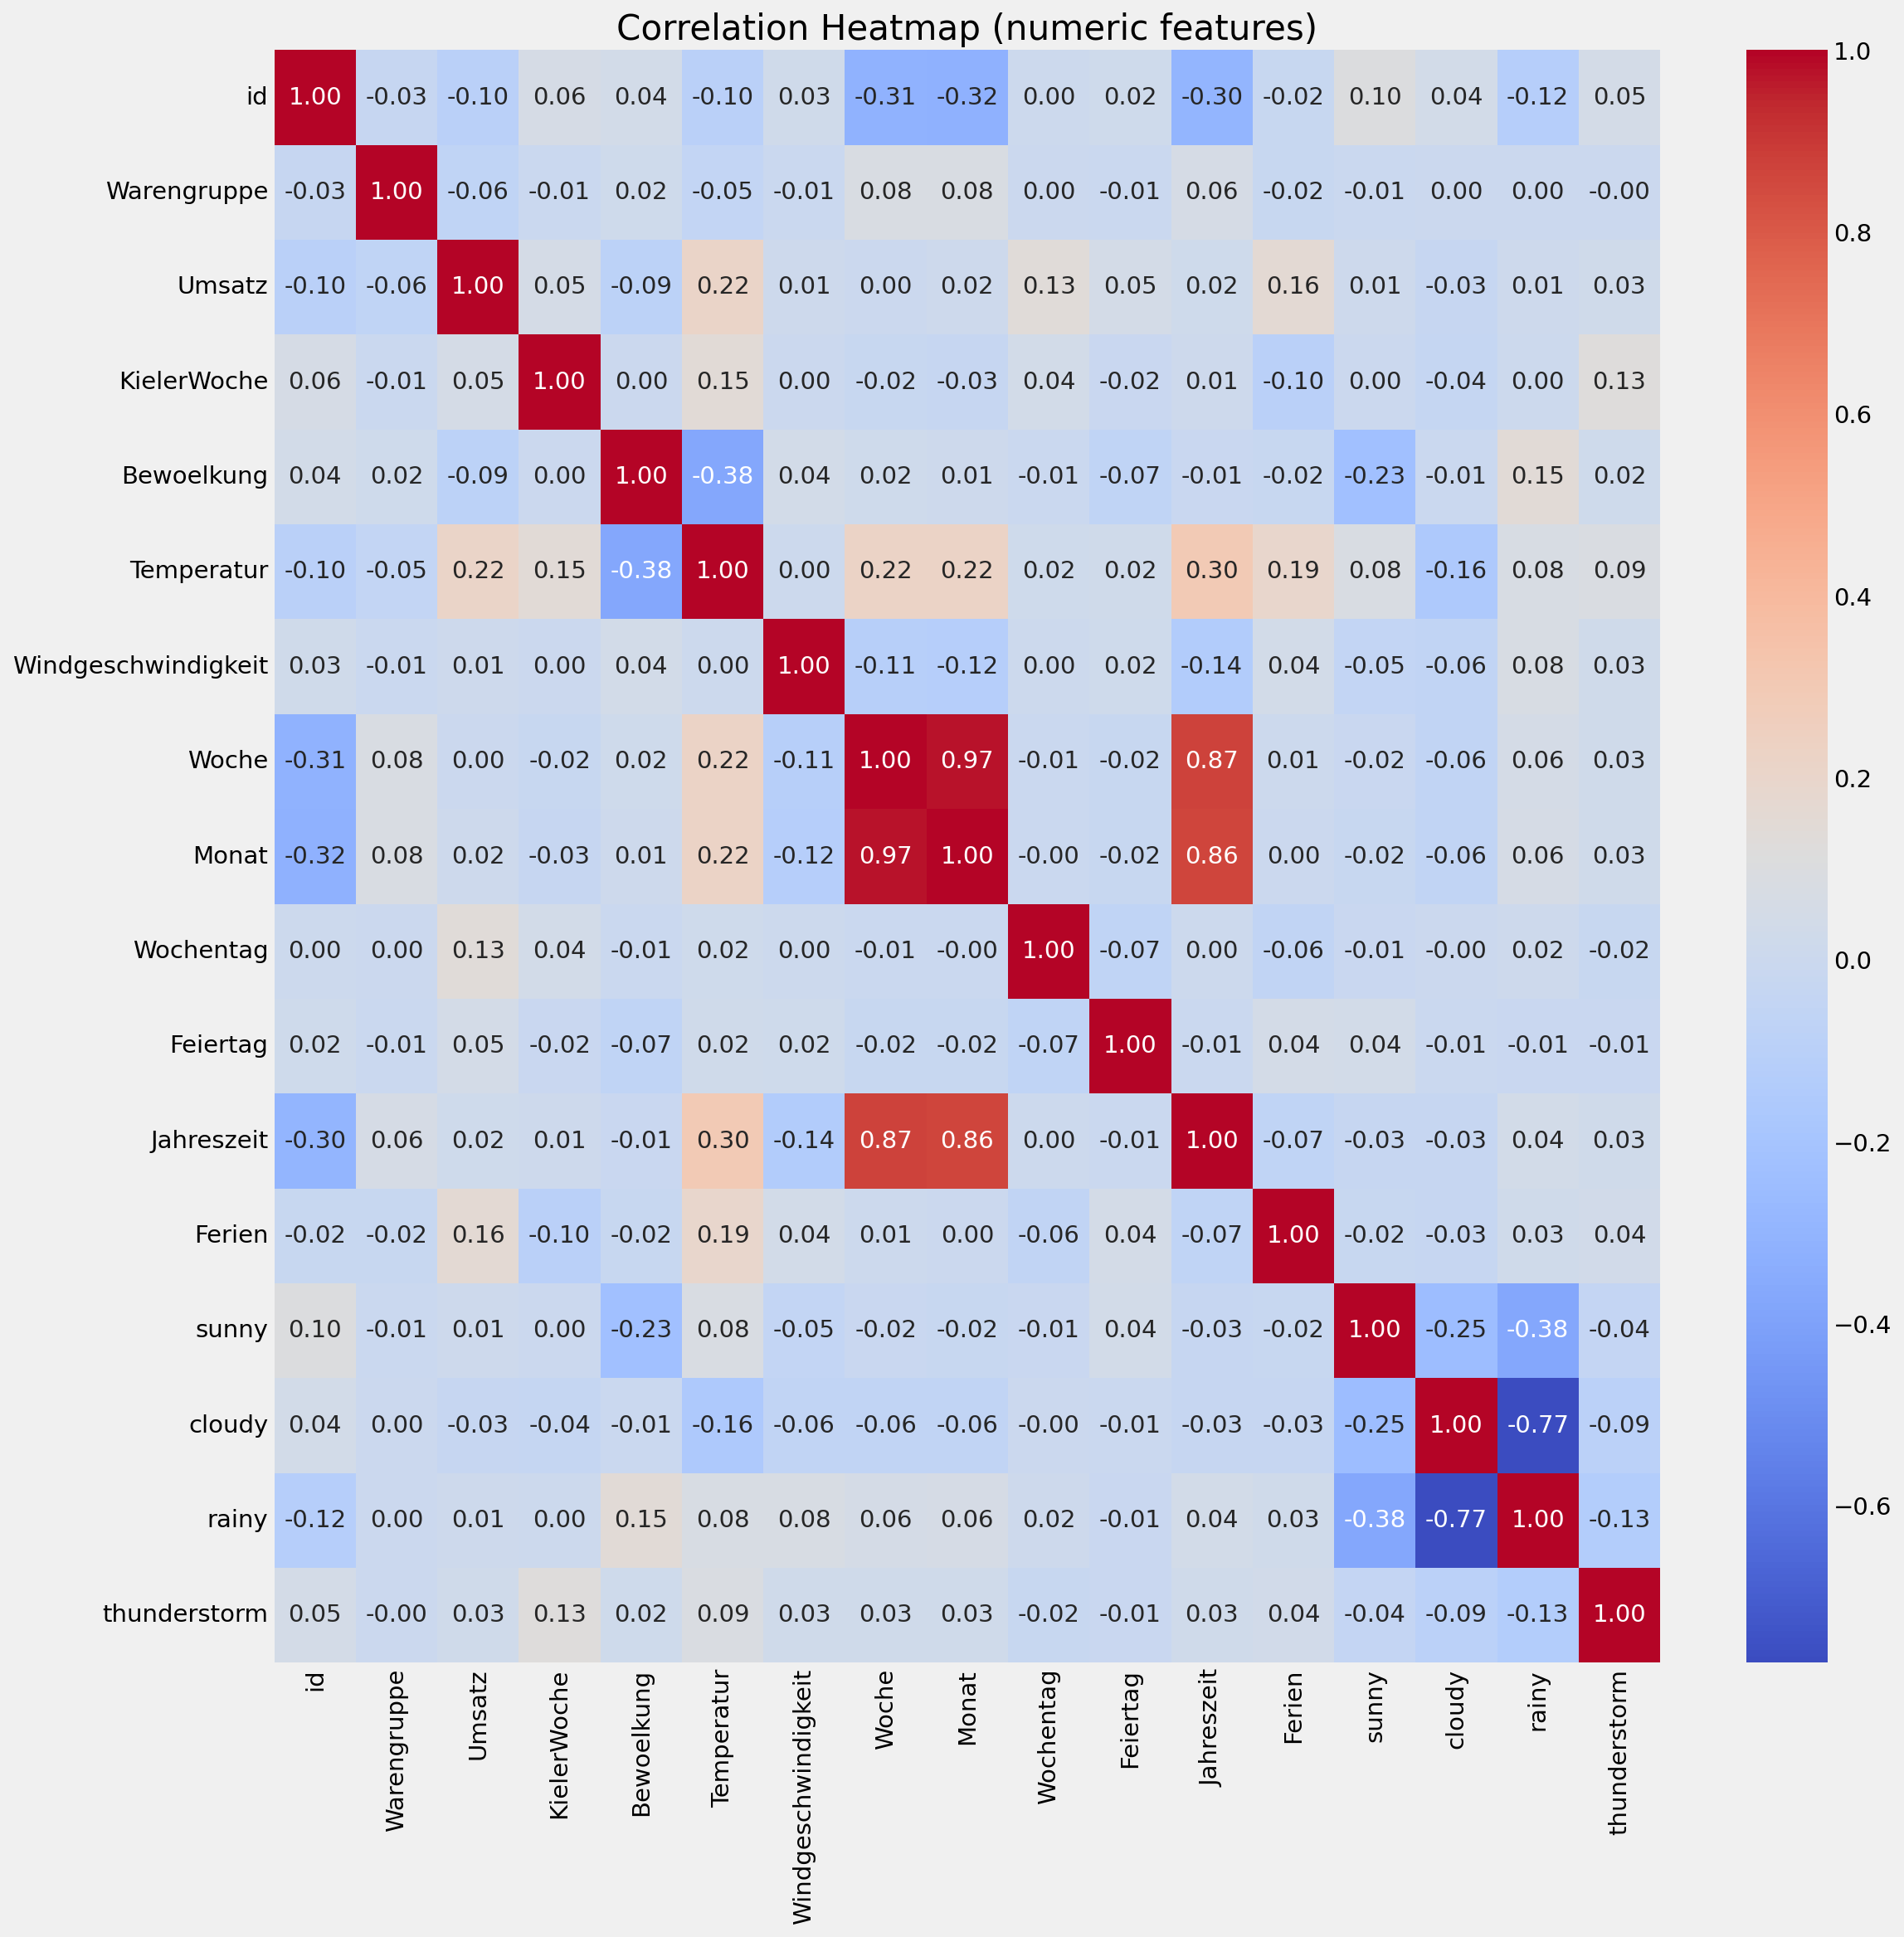

In [17]:
# Create a correlation heatmap with 2 decimal places

correlation_matrix = df_num_feature.corr()

plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (numeric features)")
plt.show()


So , with the current pre-processed data, our dependent variable (Target) , i.e. Umsatz (Revenue) has decent (more than 10%) correlation with 

- Temperature (~0.21)
- Wochentag (~0.13) 
- Ferien (~0.16) aka School Holiday


The following code snippet is similar to tasks done in *DeepLearningAI Course* reference materials

In [18]:
#one hot encoding categorical features warengruppe, wochentag, monat



# we will use the Temperature, Wochentag, Ferien and wettercode as features to predict the sales
predictors = ['Temperatur', 'Wochentag', 'Ferien', 'Warengruppe']

# get the dummy variables for the Wettercode column
features_with_dummies = pd.get_dummies(df_sales[predictors], drop_first=True, dtype=int)

features_with_dummies.head()


,Temperatur,Wochentag,Ferien,Warengruppe
0,17.8375,1,0,1
1,17.8375,1,0,2
2,17.8375,1,0,3
3,17.8375,1,0,4
4,17.8375,1,0,5


In [29]:
train_data = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_data/train_data.csv", encoding = "utf-8")
# create the model
model = smf.ols('Umsatz ~ Temperatur + Wochentag + Ferien + C(Warengruppe)', data=train_data).fit()
#try1 = smf.ols('Umsatz ~ Temperatur + Wochentag + Ferien + C(Warengruppe) + C(Monat) + C(Woche)', data=train_data).fit()
#try2 = smf.ols('Umsatz ~ C(Warengruppe) + KielerWoche + Bewoelkung  + C(Monat) + C(Wochentag) + Feiertag + C(Jahreszeit) + Ferien + sunny + cloudy + rainy + thunderstorm', data=train_data).fit()

# print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     2410.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:13:27   Log-Likelihood:                -43290.
No. Observations:                7493   AIC:                         8.660e+04
Df Residuals:                    7484   BIC:                         8.666e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              24.9220    

# Prediction



In [30]:
# get the predictions for validation data
df_val = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_data/val_data.csv", encoding = "utf-8")
df_val['Datum'] = pd.to_datetime(df_val['Datum'], format='%Y-%m-%d')

predict = model.predict(df_val)

# calculate the Mean absolute percentage error (MAPE)
mape = (abs((df_val['Umsatz'] - predict) / df_val['Umsatz'])).mean() * 100
print(f"Mean Absolute Percentage Error: {mape}%")

#for each warengruppe calculate the MAPE
warengruppen = df_val['Warengruppe'].unique()
for warengruppe in warengruppen:
    df_warengruppe = df_val[df_val['Warengruppe'] == warengruppe]
    predict_warengruppe = model.predict(df_warengruppe)
    mape_warengruppe = (abs((df_warengruppe['Umsatz'] - predict_warengruppe) / df_warengruppe['Umsatz'])).mean() * 100
    print(f"Warengruppe: {warengruppe}, MAPE: {mape_warengruppe}%")

Mean Absolute Percentage Error: 34.527664572111945%
Warengruppe: 1, MAPE: 36.91565303463775%
Warengruppe: 2, MAPE: 30.43092468179874%
Warengruppe: 3, MAPE: 28.548107743559477%
Warengruppe: 4, MAPE: 49.13204073250536%
Warengruppe: 5, MAPE: 20.930736585209065%
Warengruppe: 6, MAPE: 77.11814760027634%


In [26]:
df_test = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_data/test_data.csv", encoding = "utf-8")
df_test['Datum'] = pd.to_datetime(df_test['Datum'], format='%Y-%m-%d')
predict_test = model.predict(df_test)

#save predictions to csv just id and predicted umsatz
df_test['Predicted_Umsatz'] = predict_test
df_test[['id', 'Predicted_Umsatz']].to_csv("/workspaces/bakery_prediction/2_BaselineModel/prediction/try1?.csv", index=False)